In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [65]:
dataset = pd.read_csv('dataset_country.csv', delimiter=';')
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [66]:
print (x)

[['Belgium' 40.0 45000.0]
 ['Cambodia' 56.0 56000.0]
 ['Blgium' 36.0 nan]
 ['France' nan 18000.0]
 ['Belgium' 24.0 39000.0]
 ['Belgium' 55.0 47000.0]
 ['Cambodia' 35.0 22000.0]
 ['France' 70.0 42000.0]]


In [67]:
print (y)

['No' 'Yes' 'No' 'Yes' 'Yes' 'No' 'No' 'Yes']


In [68]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(x[:, 1:3])
x[:, 1:3] = imputer.transform(x[:, 1:3])

In [69]:
print (x)

[['Belgium' 40.0 45000.0]
 ['Cambodia' 56.0 56000.0]
 ['Blgium' 36.0 38428.57142857143]
 ['France' 45.142857142857146 18000.0]
 ['Belgium' 24.0 39000.0]
 ['Belgium' 55.0 47000.0]
 ['Cambodia' 35.0 22000.0]
 ['France' 70.0 42000.0]]


In [70]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [71]:
print (x)

[[1.0 0.0 0.0 0.0 40.0 45000.0]
 [0.0 0.0 1.0 0.0 56.0 56000.0]
 [0.0 1.0 0.0 0.0 36.0 38428.57142857143]
 [0.0 0.0 0.0 1.0 45.142857142857146 18000.0]
 [1.0 0.0 0.0 0.0 24.0 39000.0]
 [1.0 0.0 0.0 0.0 55.0 47000.0]
 [0.0 0.0 1.0 0.0 35.0 22000.0]
 [0.0 0.0 0.0 1.0 70.0 42000.0]]


In [72]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [73]:
print(y)

[0 1 0 1 1 0 0 1]


In [74]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [75]:
print (x_train)

[[0.0 0.0 1.0 0.0 56.0 56000.0]
 [0.0 0.0 1.0 0.0 35.0 22000.0]
 [1.0 0.0 0.0 0.0 40.0 45000.0]
 [1.0 0.0 0.0 0.0 24.0 39000.0]
 [0.0 0.0 0.0 1.0 45.142857142857146 18000.0]
 [1.0 0.0 0.0 0.0 55.0 47000.0]]


In [76]:
print (x_test)

[[0.0 0.0 0.0 1.0 70.0 42000.0]
 [0.0 1.0 0.0 0.0 36.0 38428.57142857143]]


In [77]:
print (y_train)

[1 0 0 1 1 0]


In [78]:
print (y_test)

[1 0]


In [79]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:, 3:] = sc.fit_transform(x_train[:, 3:])
x_test[:, 3:] = sc.transform(x_test[:, 3:])

In [80]:
print(x_train)

[[0.0 0.0 1.0 -0.4472135954999579 1.2051613037637987 1.335138812600483]
 [0.0 0.0 1.0 -0.4472135954999579 -0.6728462402638878 -1.1636530935508802]
 [1.0 0.0 0.0 -0.4472135954999579 -0.22570158692396247 0.5267061370809244]
 [1.0 0.0 0.0 -0.4472135954999579 -1.6565644776117237 0.0857428595248015]
 [0.0 0.0 0.0 2.23606797749979 0.23421862793996104 -1.4576286119216286]
 [1.0 0.0 0.0 -0.4472135954999579 1.1157323730958137 0.6736938962662987]]


In [81]:
print (x_test)

[[0.0 0.0 0.0 2.23606797749979 2.4571663331155897 0.30622449830286297]
 [0.0 1.0 0.0 -0.4472135954999579 -0.5834173095959028 0.04374635690040876]]


In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

regressor = LinearRegression()

regressor.fit(x_train, y_train)

print("Koefisien regresi:", regressor.coef_)
print("Intercept regresi:", regressor.intercept_)


Koefisien regresi: [-4.80211506e-01 -1.24900090e-16  2.18333883e-01  7.02691401e-01
 -5.15358636e-01  7.66921650e-01]
Intercept regresi: 0.6673277922146371


In [83]:
print("Hasil Prediksi:", y_pred)
print("Nilai Asli y_test:", y_test)

Hasil Prediksi: [ 0.52515821 -0.57583618]
Nilai Asli y_test: [1 0]


In [84]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

R² Score: -0.1141
Mean Squared Error: 0.2785


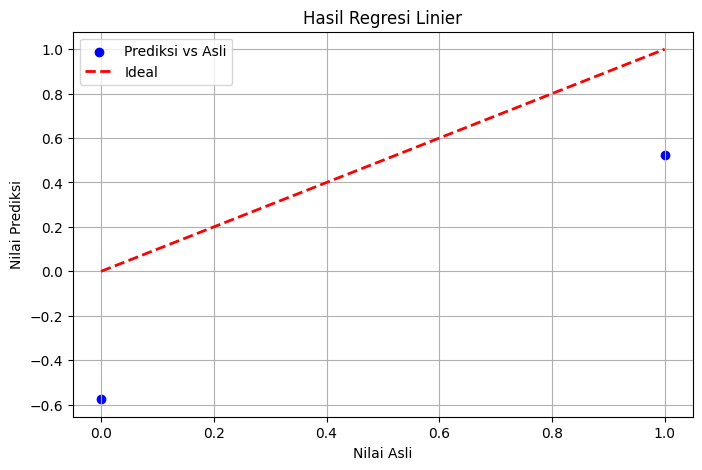

In [85]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color='blue', label='Prediksi vs Asli')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal')
plt.xlabel('Nilai Asli')
plt.ylabel('Nilai Prediksi')
plt.title('Hasil Regresi Linier')
plt.legend()
plt.grid(True)
plt.show()